image.png

# Entrega # 1 Proyecto final - Redes neuronales para la clasificación de tumores de seno



Este notebook corresponde a la primera entrega que consiste en dar solución a el problema de clasificación de tumores de seno utilizando técnicas de aprendizaje profundo

Entregado por: 
   * Nikolas Rodriguez     
   * Angie Zapata 
   * Nicolas Mendez
   * Cristian Cristancho

## Importar librerias 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.tree import DecisionTreeClassifier

In [45]:
df = pd.read_csv('../Datos/Breast Cancer Prediction.csv')
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


<AxesSubplot:>

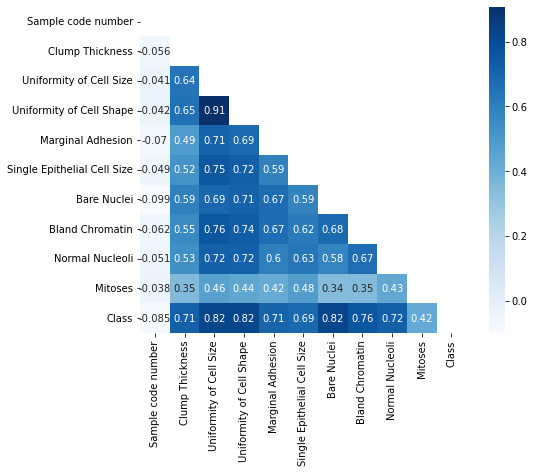

In [3]:
mask = np.zeros_like(df.corr())
tri_ind = np.triu_indices_from(mask)
mask[tri_ind] = True
plt.figure(figsize=[8, 6])
sns.heatmap(data=df.corr(), annot=True, mask=mask, cmap='Blues', square=True)

In [4]:
df.dtypes

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [5]:
def Clases(x):
    xz = list(df[x].value_counts().index)
    y = list(df[x].value_counts().values)
    plt.bar(xz,y)
    plt.show()

In [6]:
df['Marginal Adhesion'].value_counts()

1     393
3      58
2      58
10     55
4      33
8      25
5      23
6      21
7      13
9       4
Name: Marginal Adhesion, dtype: int64

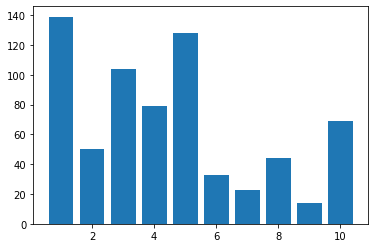

In [7]:
Clases('Clump Thickness')

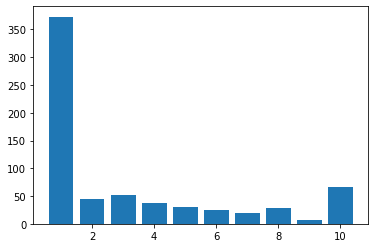

In [8]:
Clases('Uniformity of Cell Size')

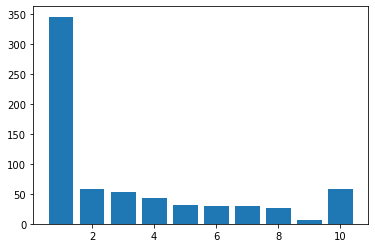

In [9]:
Clases('Uniformity of Cell Shape')

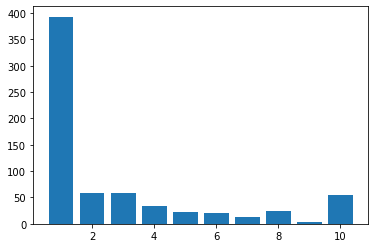

In [10]:
Clases('Marginal Adhesion')

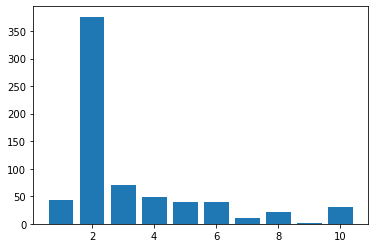

In [11]:
Clases('Single Epithelial Cell Size')

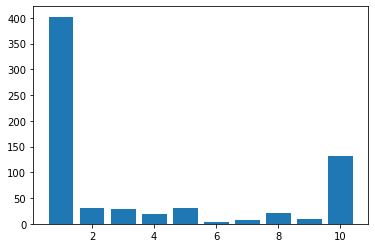

In [12]:
Clases('Bare Nuclei')

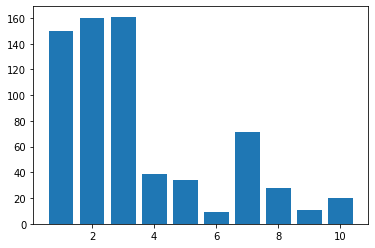

In [13]:
Clases('Bland Chromatin')

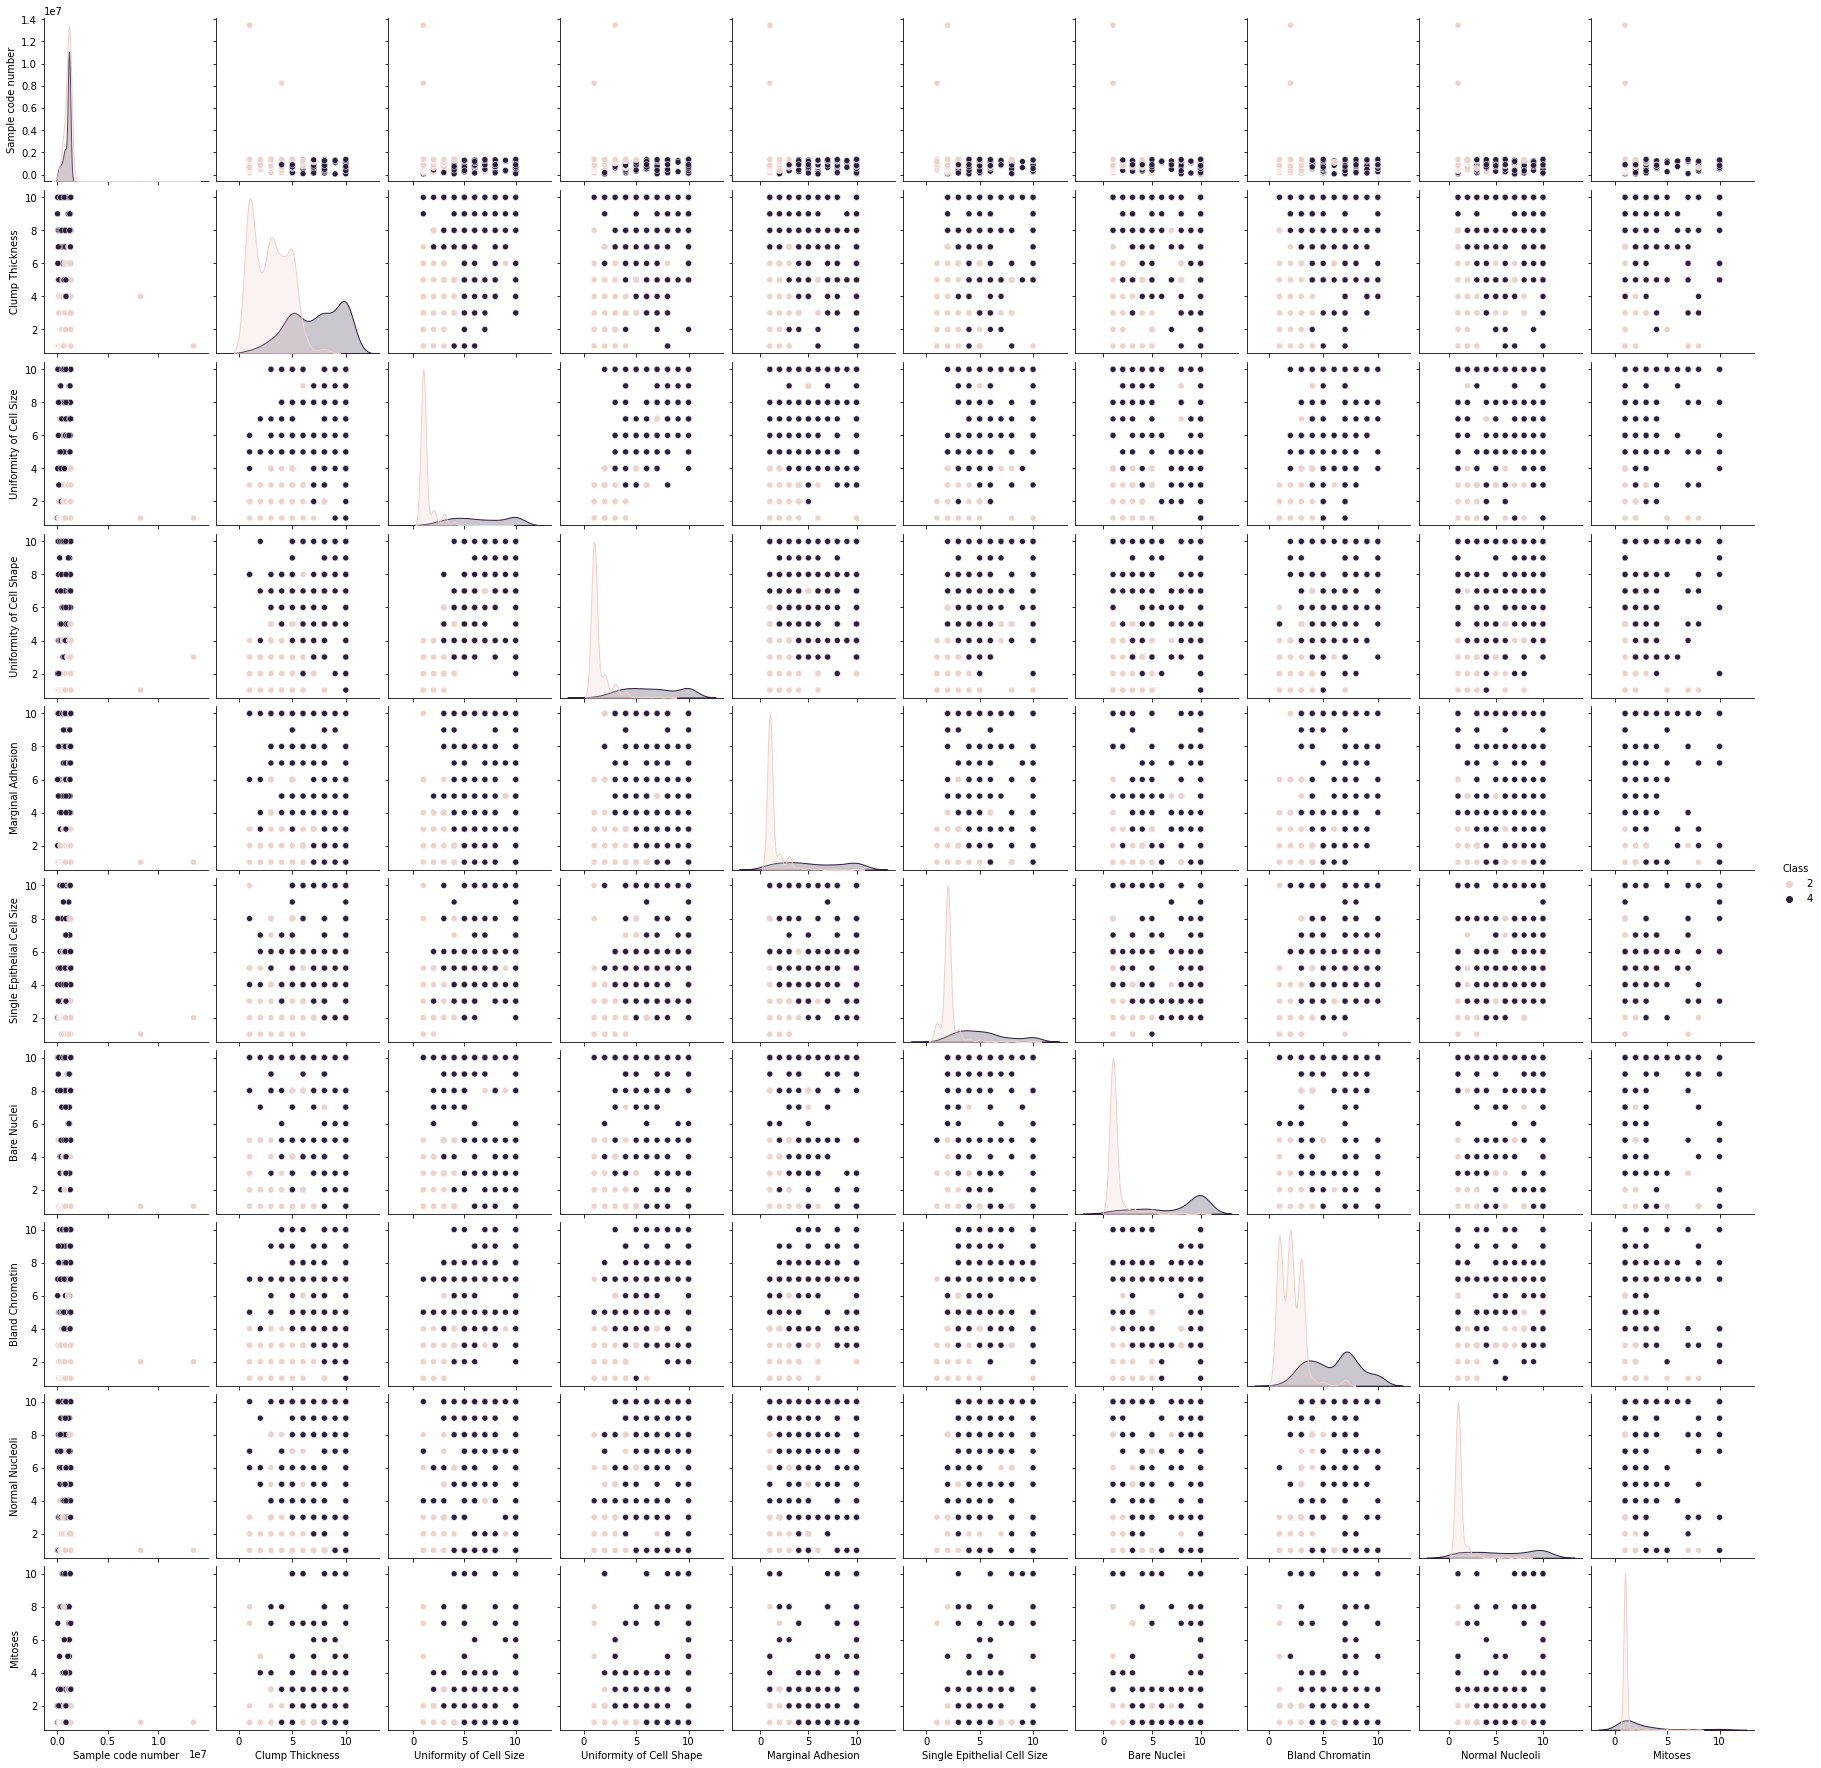

In [14]:
sns.pairplot(df, hue="Class")

In [46]:
df = df[['Clump Thickness', 'Single Epithelial Cell Size', 'Normal Nucleoli', 'Bland Chromatin', 'Class']]

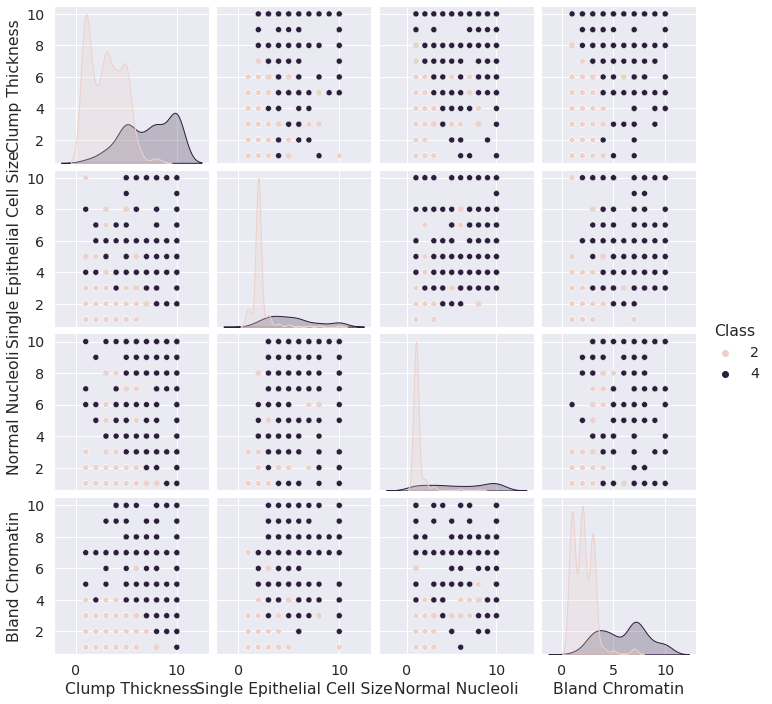

In [47]:
sns.pairplot(df, hue="Class")

In [17]:
df['Class'] = df['Class'].apply(lambda x: 1 if x==4 else 0 )
df['Class'].value_counts()

/tmp/ipykernel_14362/1716922738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class'] = df['Class'].apply(lambda x: 1 if x==4 else 0 )


0    444
1    239
Name: Class, dtype: int64

In [18]:
x = df.drop(columns="Class")
y = df["Class"]

In [19]:
from sklearn.model_selection import train_test_split
X_train, test_x, y_train, test_lab = train_test_split(x,y,
                                                 test_size = 0.4,
                                                 random_state = 42)

In [20]:
clf = DecisionTreeClassifier(max_depth =3, random_state = 50)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=50)

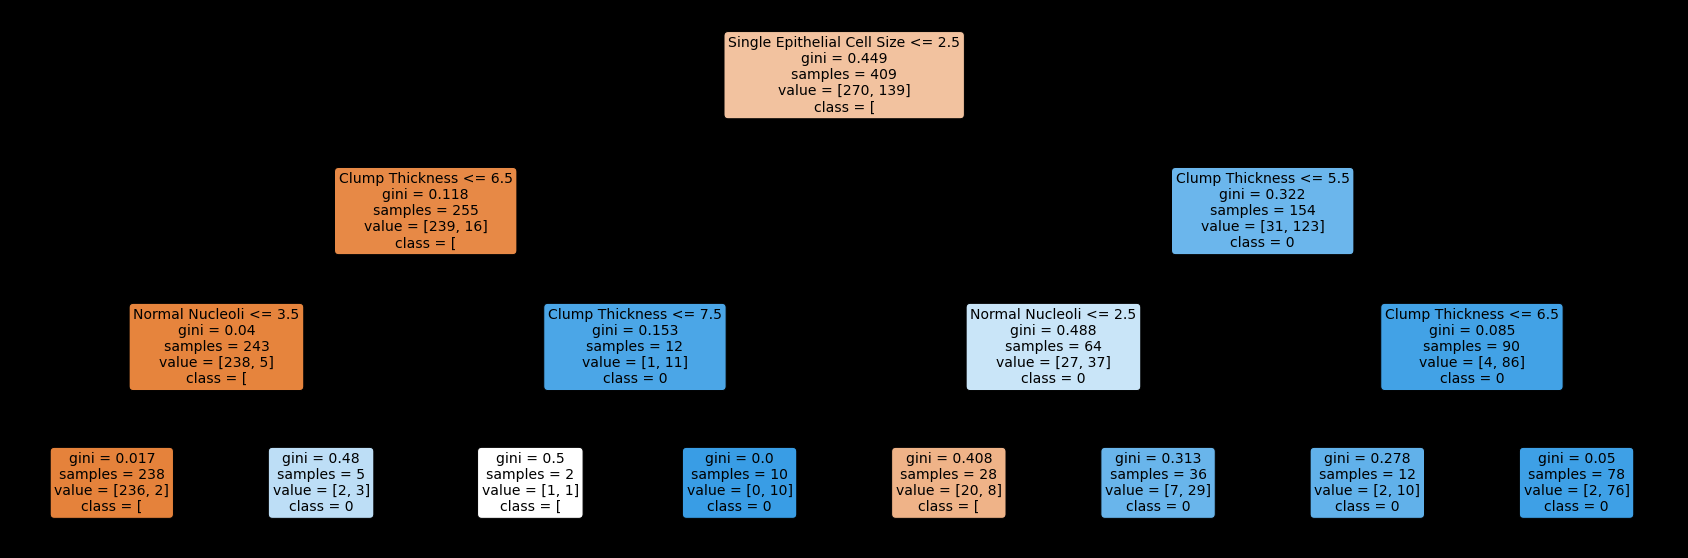

In [21]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10), facecolor ='k')
feature_names = x.columns
labels = str(y.unique())

a = tree.plot_tree(clf,
                   feature_names = feature_names,
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=14)
plt.show()

In [22]:
from sklearn.tree import export_text

tree_rules = export_text(clf,
                        feature_names = list(feature_names))

print(tree_rules)

|--- Single Epithelial Cell Size <= 2.50
|   |--- Clump Thickness <= 6.50
|   |   |--- Normal Nucleoli <= 3.50
|   |   |   |--- class: 0
|   |   |--- Normal Nucleoli >  3.50
|   |   |   |--- class: 1
|   |--- Clump Thickness >  6.50
|   |   |--- Clump Thickness <= 7.50
|   |   |   |--- class: 0
|   |   |--- Clump Thickness >  7.50
|   |   |   |--- class: 1
|--- Single Epithelial Cell Size >  2.50
|   |--- Clump Thickness <= 5.50
|   |   |--- Normal Nucleoli <= 2.50
|   |   |   |--- class: 0
|   |   |--- Normal Nucleoli >  2.50
|   |   |   |--- class: 1
|   |--- Clump Thickness >  5.50
|   |   |--- Clump Thickness <= 6.50
|   |   |   |--- class: 1
|   |   |--- Clump Thickness >  6.50
|   |   |   |--- class: 1



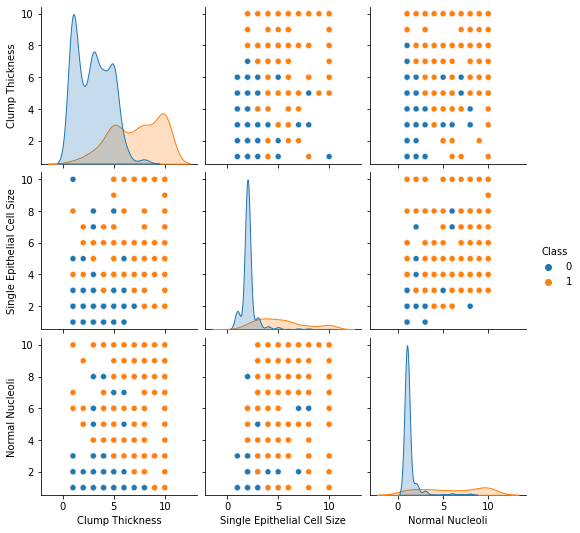

In [23]:
sns.pairplot(df, hue="Class")

In [24]:
test_pred_decision_tree = clf.predict(test_x)

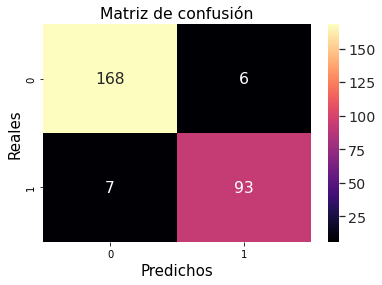

<Figure size 720x504 with 0 Axes>

In [25]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(test_lab,  
                                            test_pred_decision_tree)

matrix_df = pd.DataFrame(confusion_matrix)

ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")

ax.set_title('Matriz de confusión')
ax.set_xlabel("Predichos", fontsize =15)
ax.set_ylabel("Reales", fontsize=15)
plt.show()

In [26]:
metrics.accuracy_score(test_lab, test_pred_decision_tree)

0.9525547445255474

In [27]:
import skfuzzy as fuzz
from skfuzzy import control as fuzzy 

In [28]:
df.columns

Index(['Clump Thickness', 'Single Epithelial Cell Size', 'Normal Nucleoli',
       'Class'],
      dtype='object')

In [96]:
Clump_Thickness = fuzzy.Antecedent(np.arange(1,11,1), 'Clump_Thickness')
Epithelial = fuzzy.Antecedent(np.arange(1,11,1), 'Epithelial')
Normal_Nucleoli = fuzzy.Antecedent(np.arange(1,11,1), 'Normal_Nucleoli')
Bland = fuzzy.Antecedent(np.arange(1,11,1), 'Bland')


cancer = fuzzy.Consequent(np.arange(1,11,1), 'cancer')

Clump_Thickness.automf(3)
Epithelial.automf(3)
Normal_Nucleoli.automf(3)
Bland.automf(3)
cancer.automf(3)

/home/sheldor/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


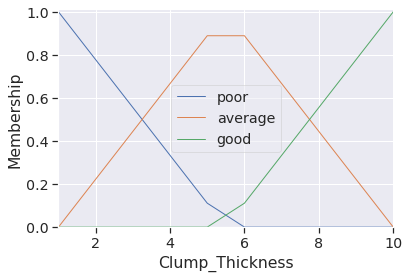

In [39]:
Clump_Thickness.view()

/home/sheldor/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


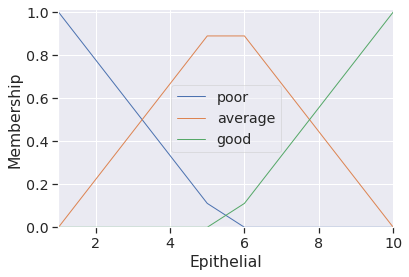

In [107]:
Epithelial.view()

/home/sheldor/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


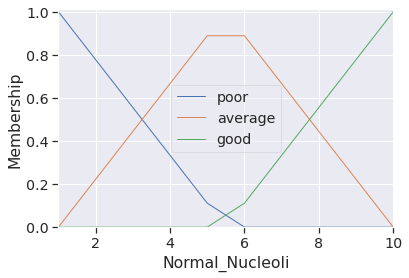

In [108]:
Normal_Nucleoli.view()

/home/sheldor/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


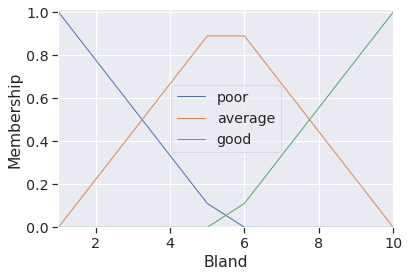

In [109]:
Bland.view()

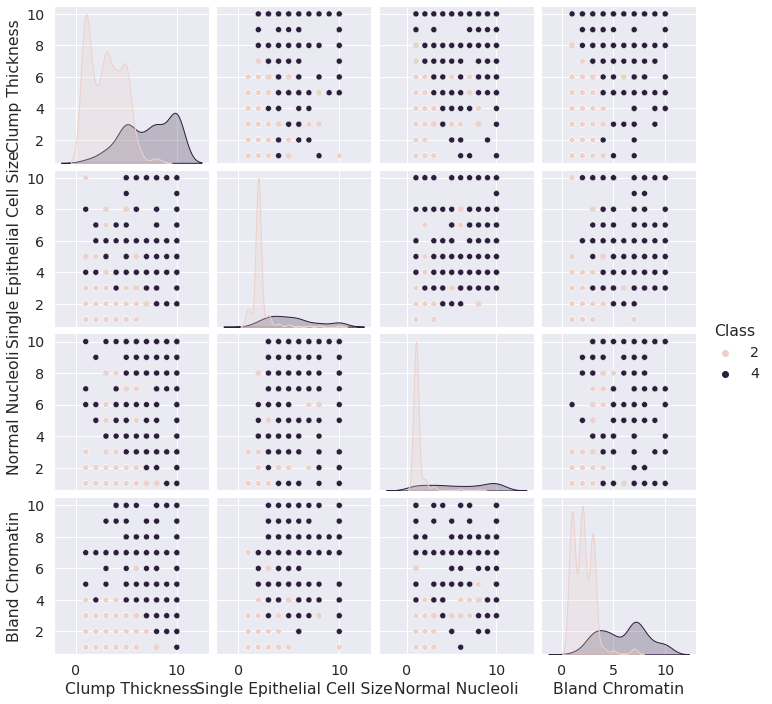

In [48]:
sns.pairplot(df, hue="Class")

In [97]:
rule1 = fuzzy.Rule(Clump_Thickness['poor'] & Epithelial['poor'] & Normal_Nucleoli['poor'] & Bland['poor'], cancer['poor'])
rule2 = fuzzy.Rule(Clump_Thickness['poor'] & Epithelial['poor'] & Normal_Nucleoli['average'] & Bland['average'], cancer['poor'])
rule3 = fuzzy.Rule(Clump_Thickness['poor'] & Epithelial['poor'] & Normal_Nucleoli['average'] & Bland['good'], cancer['poor'])
rule4 = fuzzy.Rule(Clump_Thickness['poor'] & Epithelial['poor'] & Normal_Nucleoli['poor'] & Bland['average'], cancer['poor'])

rule5 = fuzzy.Rule(Clump_Thickness['poor'] & Epithelial['poor'] & Normal_Nucleoli['poor'] & Bland['average'], cancer['poor'])
rule6 = fuzzy.Rule(Clump_Thickness['poor'] & Epithelial['poor'] & Normal_Nucleoli['poor'] & Bland['average'], cancer['poor'])
rule7 = fuzzy.Rule(Clump_Thickness['poor'] & Epithelial['poor'] & Normal_Nucleoli['poor'] & Bland['good'], cancer['poor'])
rule8 = fuzzy.Rule(Clump_Thickness['poor'] & Epithelial['poor'] & Normal_Nucleoli['poor'] & Bland['good'], cancer['poor'])

rule9 = fuzzy.Rule(Clump_Thickness['poor'] & Epithelial['poor'] & Normal_Nucleoli['poor'] & Bland['good'], cancer['average'])
rule10 = fuzzy.Rule(Clump_Thickness['poor'] & Epithelial['poor'] & Normal_Nucleoli['poor'] & Bland['good'], cancer['average'])
rule11 = fuzzy.Rule(Clump_Thickness['poor'] & Epithelial['poor'] & Normal_Nucleoli['poor'] & Bland['good'], cancer['average'])
rule12 = fuzzy.Rule(Clump_Thickness['poor'] & Epithelial['poor'] & Normal_Nucleoli['poor'] & Bland['good'], cancer['average'])

rule13 = fuzzy.Rule(Clump_Thickness['poor'] & Epithelial['poor'] & Normal_Nucleoli['good'] & Bland['poor'], cancer['average'])
rule14 = fuzzy.Rule(Clump_Thickness['poor'] & Epithelial['poor'] & Normal_Nucleoli['poor'] & Bland['poor'], cancer['average'])
rule15 = fuzzy.Rule(Clump_Thickness['poor'] & Epithelial['good'] & Normal_Nucleoli['poor'] & Bland['poor'], cancer['average'])
rule16 = fuzzy.Rule(Clump_Thickness['good'] & Epithelial['poor'] & Normal_Nucleoli['poor'] & Bland['poor'], cancer['average'])

rule17 = fuzzy.Rule(Clump_Thickness['average'] & Epithelial['poor'] & Normal_Nucleoli['good'] & Bland['poor'], cancer['poor'])
rule18 = fuzzy.Rule(Clump_Thickness['poor'] & Epithelial['average'] & Normal_Nucleoli['poor'] & Bland['poor'], cancer['poor'])
rule19 = fuzzy.Rule(Clump_Thickness['poor'] & Epithelial['good'] & Normal_Nucleoli['good'] & Bland['poor'], cancer['poor'])
rule20 = fuzzy.Rule(Clump_Thickness['good'] & Epithelial['poor'] & Normal_Nucleoli['poor'] & Bland['average'], cancer['poor'])

rule20 = fuzzy.Rule(Clump_Thickness['good'] & Epithelial['poor'] & Normal_Nucleoli['poor'] & Bland['good'], cancer['good'])
rule21 = fuzzy.Rule(Clump_Thickness['poor'] & Epithelial['good'] & Normal_Nucleoli['average'] & Bland['poor'], cancer['good'])
rule22 = fuzzy.Rule(Clump_Thickness['poor'] & Epithelial['average'] & Normal_Nucleoli['good'] & Bland['poor'], cancer['good'])
rule23 = fuzzy.Rule(Clump_Thickness['poor'] & Epithelial['average'] & Normal_Nucleoli['poor'] & Bland['good'], cancer['good'])

rule24 = fuzzy.Rule(Clump_Thickness['good'] & Epithelial['average'] & Normal_Nucleoli['poor'] & Bland['good'], cancer['good'])
rule25 = fuzzy.Rule(Clump_Thickness['good'] & Epithelial['good'] & Normal_Nucleoli['average'] & Bland['poor'], cancer['good'])
rule26 = fuzzy.Rule(Clump_Thickness['average'] & Epithelial['average'] & Normal_Nucleoli['good'] & Bland['poor'], cancer['good'])
rule27 = fuzzy.Rule(Clump_Thickness['average'] & Epithelial['average'] & Normal_Nucleoli['poor'] & Bland['good'], cancer['good'])


In [98]:
conocimiento_cancer = fuzzy.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule20,
                                            rule21, rule22, rule23, rule24, rule25, rule26, rule27])

cancer_fuzzy = fuzzy.ControlSystemSimulation(conocimiento_cancer)                           

In [99]:
for inp_var in cancer_fuzzy.input.sim.ctrl.antecedents:
        print(inp_var)

Antecedent: Clump_Thickness
Antecedent: Epithelial
Antecedent: Normal_Nucleoli
Antecedent: Bland


In [100]:
for out_var in cancer_fuzzy.input.sim.ctrl.consequents:
        print(out_var)

Consequent: cancer


In [120]:
cancer_fuzzy.input['Clump_Thickness'] = 2
cancer_fuzzy.input['Epithelial'] = 2
cancer_fuzzy.input['Normal_Nucleoli'] = 9
cancer_fuzzy.input['Bland'] = 3

cancer_fuzzy.compute()

In [122]:
cancer_fuzzy.input['Clump_Thickness'] = 8
cancer_fuzzy.input['Epithelial'] = 2
cancer_fuzzy.input['Normal_Nucleoli'] = 9
cancer_fuzzy.input['Bland'] = 3

cancer_fuzzy.compute()

7.914141414141414


/home/sheldor/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


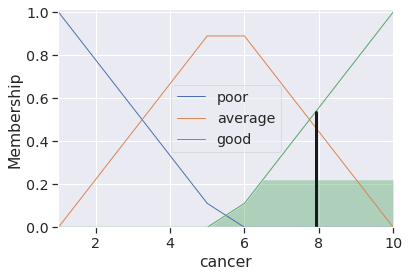

In [123]:
print(cancer_fuzzy.output['cancer'])
cancer.view(sim=cancer_fuzzy)